In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# print(data), the time_series csv file describes each country's situations until 2020-04-10
csv = 'time-series-19-covid-combined.csv'
data = pd.read_csv(csv, error_bad_lines=False)

In [3]:
#Here we list the content of each column
list(data)

['Date',
 'Country/Region',
 'Province/State',
 'Lat',
 'Long',
 'Confirmed',
 'Recovered',
 'Deaths']

In [4]:
#this dataset shows the total numbers of confirmed,recovered and death til the latest date(2020-04-17) in each country
lastDate = data['Date'].max()
df_sum = data.loc[data['Date'] == lastDate]
print(df_sum)

             Date          Country/Region                Province/State  \
79     2020-04-10             Afghanistan                           NaN   
159    2020-04-10                 Albania                           NaN   
239    2020-04-10                 Algeria                           NaN   
319    2020-04-10                 Andorra                           NaN   
399    2020-04-10                  Angola                           NaN   
479    2020-04-10     Antigua and Barbuda                           NaN   
559    2020-04-10               Argentina                           NaN   
639    2020-04-10                 Armenia                           NaN   
719    2020-04-10               Australia  Australian Capital Territory   
799    2020-04-10               Australia               New South Wales   
879    2020-04-10               Australia            Northern Territory   
959    2020-04-10               Australia                    Queensland   
1039   2020-04-10        

In [5]:
data_latest = df_sum.groupby(['Country/Region'],as_index=False).agg({'Confirmed':sum, 'Recovered':sum, 'Deaths':sum})

#now we select a subset of countries with highest number of confirmed cases
data_10 = data_latest.sort_values('Confirmed', ascending=False)[:10]
print(data_10)

     Country/Region  Confirmed  Recovered   Deaths
171              US   496535.0    28790.0  18586.0
156           Spain   158273.0    55668.0  16081.0
84            Italy   147577.0    30455.0  18849.0
61           France   125931.0    25195.0  13215.0
65          Germany   122171.0    53913.0   2767.0
36            China    82941.0    77791.0   3340.0
175  United Kingdom    74605.0      588.0   8974.0
80             Iran    68192.0    35465.0   4232.0
170          Turkey    47029.0     2423.0   1006.0
16          Belgium    26667.0     5568.0   3019.0


In [6]:
#extract the top 10 countries's time series data  ['US', 'Spain', 'Italy', 'France', 'Germany', 'China','United Kingdom','Iran', 'Turkey', 'Belgium']
data0 = data.loc[data['Country/Region'].isin(data_10['Country/Region'].tolist())]

#For convenience, we seperate each country's data
data_us  = data0.loc[data['Country/Region'] == 'US']
data_sp  = data0.loc[data['Country/Region'] == 'Spain']
data_it = data0.loc[data['Country/Region'] == 'Italy']
data_fr =  data0.loc[data['Country/Region'] == 'France']
data_ge = data0.loc[data['Country/Region'] == 'Germany']
data_cn = data0.loc[data['Country/Region'] == 'China']
data_uk = data0.loc[data['Country/Region'] == 'United Kingdom']
data_ir = data0.loc[data['Country/Region'] == 'Iran']
data_tk = data0.loc[data['Country/Region'] == 'Turkey']
data_bl = data0.loc[data['Country/Region'] == 'Belgium']

In [7]:
#check which countries have multiple regions, use group_by() to add
print(len(data_us))
print(len(data_sp))
print(len(data_it))
print(len(data_fr)) #has
print(len(data_ge))
print(len(data_cn)) #has
print(len(data_uk)) #has
print(len(data_ir))
print(len(data_tk))
print(len(data_bl))

80
80
80
880
80
2640
880
80
80
80


In [8]:
data_fr1 = data_fr.groupby(['Date']).agg({'Confirmed':sum, 'Recovered':sum, 'Deaths':sum})
data_cn1 = data_cn.groupby(['Date']).agg({'Confirmed':sum, 'Recovered':sum, 'Deaths':sum})
data_uk1 = data_uk.groupby(['Date']).agg({'Confirmed':sum, 'Recovered':sum, 'Deaths':sum})

In [9]:
#since we need fit the function, we need create a column of the day(the first, second, third...)
data_us.loc[:,'Day'] = range(1,len(data_us)+1)
data_cn1.loc[:,'Day'] = range(1,len(data_cn1)+1)
data_sp.loc[:,'Day'] = range(1,len(data_sp)+1)
data_it.loc[:,'Day'] = range(1,len(data_it)+1)
data_fr1.loc[:,'Day'] = range(1,len(data_fr1)+1)
data_ge.loc[:,'Day'] = range(1,len(data_ge)+1)
data_uk1.loc[:,'Day'] = range(1,len(data_uk1)+1)
data_ir.loc[:,'Day'] = range(1,len(data_ir)+1)
data_tk.loc[:,'Day'] = range(1,len(data_tk)+1)
data_bl.loc[:,'Day'] = range(1,len(data_bl)+1)

C:\Users\jinru\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jinru\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
#a)
#Here we define two functions: Exponential function and Logistic function.
#Then we use this two functions to fit regarding different countries
def func1(t,a,k,t0):
    return a*np.exp(k*(t-t0))

def func2(t,L,k,t0):
    return L/(1+np.exp(-k*(t-t0)))

In [11]:
from scipy.optimize import curve_fit

t = data_us['Day']
t = np.array(t)
y = data_us['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0) 

[19.68839259  0.1172852  -7.24293408]


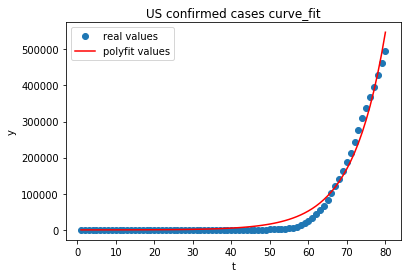

In [12]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('US confirmed cases curve_fit')
plt.show()

In [14]:
t = data_cn1['Day']
t = np.array(t)
y = data_cn1['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func2,t,y,maxfev = 30000)
print(popt)
L = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func2(t,L,k,t0)

[ 6.26657500e+04  1.41162904e+01 -5.58904769e+00]


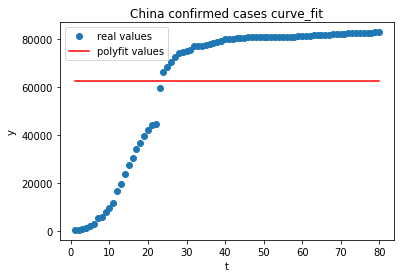

In [15]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('China confirmed cases curve_fit')
plt.show()

In [16]:
t = data_it['Day']
t = np.array(t)
y = data_it['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[ 38.87354897   0.06555581 -48.21905553]


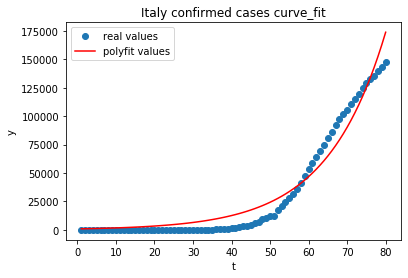

In [17]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Italy confirmed cases curve_fit')
plt.show()

In [17]:
t = data_sp['Day']
t = np.array(t)
y = data_sp['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[ 31.09408334   0.08580354 -21.33327249]


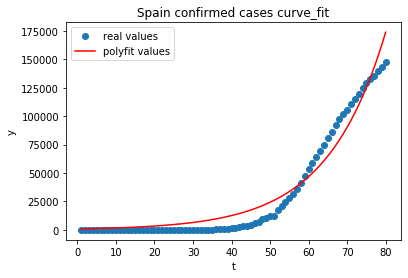

In [18]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Spain confirmed cases curve_fit')
plt.show()

In [19]:
t = data_fr1['Day']
t = np.array(t)
y = data_fr1['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[15.97381933  0.10396258 -7.33190701]


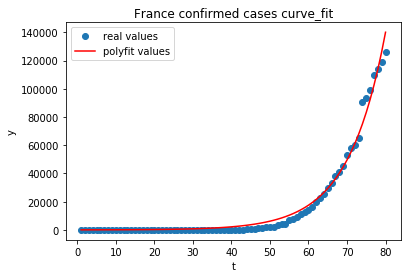

In [20]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.title('France confirmed cases curve_fit')
plt.show()

In [21]:
t = data_ge['Day']
t = np.array(t)
y = data_ge['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[ 19.73843993   0.08477107 -24.72614706]


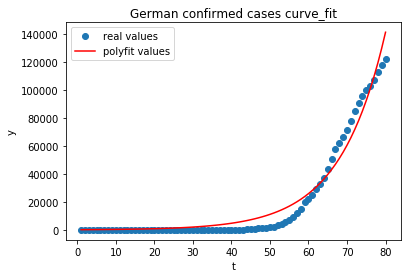

In [22]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.title('German confirmed cases curve_fit')
plt.show()

In [23]:
t = data_uk1['Day']
t = np.array(t)
y = data_uk1['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[11.60914844  0.11818439  5.34181005]


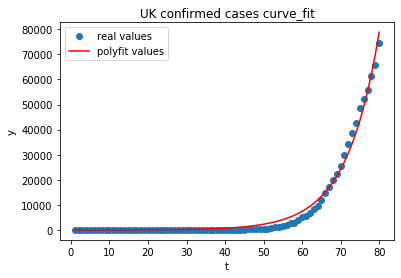

In [24]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.title('UK confirmed cases curve_fit')
plt.show()

In [25]:
t = data_ir['Day']
t = np.array(t)
y = data_ir['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[ 37.37977911   0.06734921 -33.42518133]


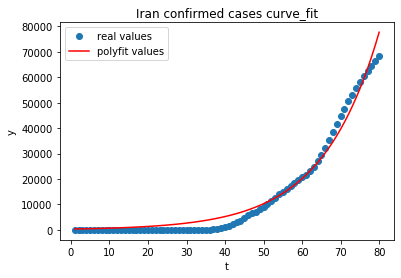

In [26]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.title('Iran confirmed cases curve_fit')
plt.show()

In [27]:
t = data_tk['Day']
t = np.array(t)
y = data_tk['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[2.28897606 0.14203225 9.60306323]


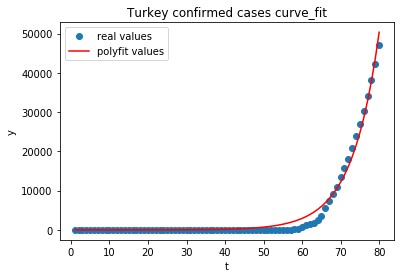

In [28]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.title('Turkey confirmed cases curve_fit')
plt.show()

In [29]:
t = data_bl['Day']
t = np.array(t)
y = data_bl['Confirmed']
y = np.array(y)

popt, pcov = curve_fit(func1,t,y,maxfev = 30000)
print(popt)
a = popt[0] 
k = popt[1]
t0 = popt[2]
yvals = func1(t,a,k,t0)

[13.21707147  0.09959646  2.53956823]


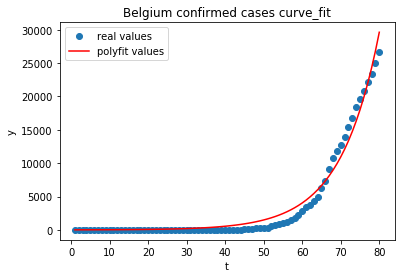

In [30]:
plot1 = plt.plot(t, y, 'o', label='real values')
plot2 = plt.plot(t, yvals,'r', label='polyfit values')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.title('Belgium confirmed cases curve_fit')
plt.show()

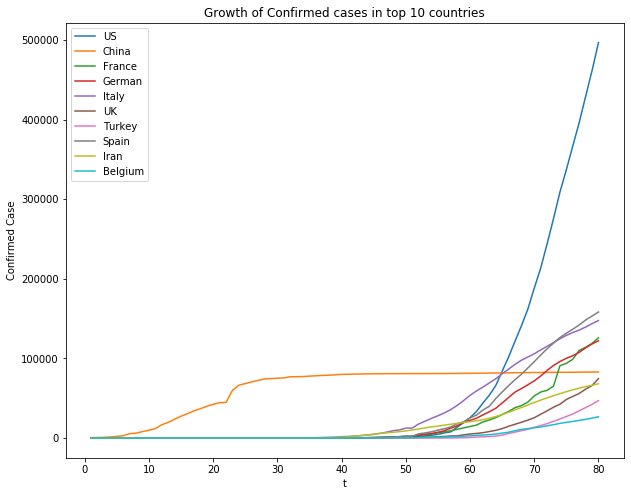

In [31]:
#create a plot contains all countries'real growth curves
plt.figure(figsize=(10,8))
plt.plot(t, data_us['Confirmed'], label='US')
plt.plot(t, data_cn1['Confirmed'], label='China')
plt.plot(t, data_fr1['Confirmed'], label='France')
plt.plot(t, data_ge['Confirmed'], label='German')
plt.plot(t, data_it['Confirmed'], label='Italy')
plt.plot(t, data_uk1['Confirmed'], label='UK')
plt.plot(t, data_tk['Confirmed'], label='Turkey')
plt.plot(t, data_sp['Confirmed'], label='Spain')
plt.plot(t, data_ir['Confirmed'], label='Iran')
plt.plot(t, data_bl['Confirmed'], label='Belgium')
plt.xlabel('t')
plt.ylabel('Confirmed Case')
plt.legend()
plt.title('Growth of Confirmed cases in top 10 countries')
plt.show()

In [32]:
#b)
#Compare the statistics conﬁrmed cases, intend to create box-plot to analyze
#Here we need to exlarge the subset because 10 data points subset is too small
data_add = data_latest.sort_values('Confirmed', ascending=False)[10:20]
data_add

,Country/Region,Confirmed,Recovered,Deaths
161,Switzerland,24551.0,11100.0,1002.0
120,Netherlands,23249.0,287.0,2520.0
32,Canada,22059.0,5855.0,557.0
23,Brazil,19638.0,173.0,1057.0
135,Portugal,15472.0,233.0,435.0
9,Austria,13555.0,6064.0,319.0
138,Russia,11917.0,795.0,94.0
90,"Korea, South",10450.0,7117.0,208.0
83,Israel,10408.0,1183.0,95.0
160,Sweden,9685.0,381.0,870.0


In [33]:
data1 = data.loc[data['Country/Region'].isin(data_add['Country/Region'].tolist())]
data_sl =  data1.loc[data['Country/Region'] == 'Switzerland']
data_nl = data1.loc[data['Country/Region'] == 'Netherlands']
data_ca  = data1.loc[data['Country/Region'] == 'Canada']
data_br = data1.loc[data['Country/Region'] == 'Brazil']
data_pt = data1.loc[data['Country/Region'] == 'Portugal']
data_au = data1.loc[data['Country/Region'] == 'Austria']
data_ru  = data1.loc[data['Country/Region'] == 'Russia']
data_kr = data1.loc[data['Country/Region'] == 'Korea, South']
data_is = data1.loc[data['Country/Region'] == 'Israel']
data_sd = data1.loc[data['Country/Region'] == 'Sweden']

In [34]:
print(len(data_ca))#has
print(len(data_ru))
print(len(data_nl))#has
print(len(data_sl)) 
print(len(data_pt))
print(len(data_au)) 
print(len(data_kr)) 
print(len(data_is))
print(len(data_sd))
print(len(data_br))

1200
80
400
80
80
80
80
80
80
80


In [35]:
data_ca1 = data_ca.groupby(['Date']).agg({'Confirmed':sum, 'Recovered':sum, 'Deaths':sum})
data_nl1 = data_nl.groupby(['Date']).agg({'Confirmed':sum, 'Recovered':sum, 'Deaths':sum})

In [36]:
confirmed_np = np.vstack((data_us['Confirmed'],data_sp['Confirmed'],data_it['Confirmed'],data_fr1['Confirmed'],
                         data_ge['Confirmed'],data_cn1['Confirmed'],data_uk1['Confirmed'],data_ir['Confirmed'],
                         data_tk['Confirmed'],data_bl['Confirmed'],data_sl['Confirmed'],data_nl1['Confirmed'],
                         data_ca1['Confirmed'],data_br['Confirmed'],data_pt['Confirmed'],data_au['Confirmed'],
                         data_ru['Confirmed'],data_kr['Confirmed'],data_is['Confirmed'],data_sd['Confirmed'],
                        )).transpose()

In [37]:
confirmed_data = pd.DataFrame(confirmed_np,
                                     columns=['US', 'Spain', 'Italy', 'France', 'Germany', 'China', 'UK', 'Iran',
                                              'Turkey', 'Belgium', 'Switzerland', 'Netherlands', 'Canada', 'Brazil', 'Portugal',
                                            'Austria', 'Russia', 'Korea, South', 'Israel','Sweden' ])

In [38]:
confirmed_data

,US,Spain,Italy,France,Germany,China,UK,Iran,Turkey,Belgium,Switzerland,Netherlands,Canada,Brazil,Portugal,Austria,Russia,"Korea, South",Israel,Sweden
0,1.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,0.0,0.0,2.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,2.0,0.0,0.0,3.0,0.0,1406.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,5.0,0.0,0.0,3.0,0.0,2075.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
5,5.0,0.0,0.0,3.0,1.0,2877.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
6,5.0,0.0,0.0,4.0,4.0,5509.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
7,5.0,0.0,0.0,5.0,4.0,6087.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
8,5.0,0.0,0.0,5.0,4.0,8141.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
9,7.0,0.0,2.0,5.0,5.0,9802.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,11.0,0.0,1.0


In [39]:
#Get the confirmed conlumn of each country,and create a list.
confirmed = confirmed_data.loc[79].tolist()
df_confirmed = pd.DataFrame(confirmed)
print(df_confirmed.describe())

                   0
count      20.000000
mean    75545.250000
std    110722.292684
min      9685.000000
25%     14992.750000
50%     25609.000000
75%     92748.500000
max    496535.000000


In [40]:
#For the 20 countries, we can know that:
Q1 = 14992
median = 25609
Q3 = 92748
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper)
print(lower)

209382.0
-101642.0


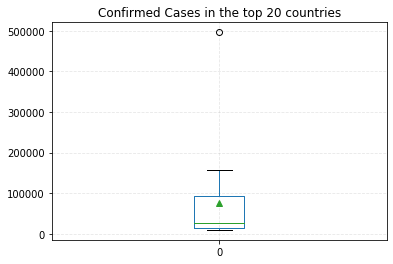

In [41]:
df_confirmed.plot.box(title="Confirmed Cases in the top 20 countries", showmeans=True)
plt.grid(linestyle="--", alpha=0.3)
plt.show() #from the box plot, we can see there is an outlier,which is number of US's cases

In [42]:
#Get the growth number of each country everyday compared to the previous day
#Since we need to graph multiple boxplots to compare, we still use 10 countries.
#US
x0 = confirmed_data.US[:-1]
x1 = confirmed_data.US[1:]
us_increase = np.array(x1)-np.array(x0)
#Spain
x0 = confirmed_data.Spain[:-1]
x1 = confirmed_data.Spain[1:]
sp_increase = np.array(x1)-np.array(x0)
#Italy
x0 = confirmed_data.Italy[:-1]
x1 = confirmed_data.Italy[1:]
it_increase = np.array(x1)-np.array(x0)
#France
x0 = confirmed_data.France[:-1]
x1 = confirmed_data.France[1:]
fr_increase = np.array(x1)-np.array(x0)
#Germany
x0 = confirmed_data.Germany[:-1]
x1 = confirmed_data.Germany[1:]
ge_increase = np.array(x1)-np.array(x0)
#China
x0 = confirmed_data.China[:-1]
x1 = confirmed_data.China[1:]
cn_increase = np.array(x1)-np.array(x0)
#UK
x0 = confirmed_data.UK[:-1]
x1 = confirmed_data.UK[1:]
uk_increase = np.array(x1)-np.array(x0)
#Iran
x0 = confirmed_data.Iran[:-1]
x1 = confirmed_data.Iran[1:]
ir_increase = np.array(x1)-np.array(x0)
#Turkey
x0 = confirmed_data.Turkey[:-1]
x1 = confirmed_data.Turkey[1:]
tk_increase = np.array(x1)-np.array(x0)
#Belgium
x0 = confirmed_data.Belgium[:-1]
x1 = confirmed_data.Belgium[1:]
bl_increase = np.array(x1)-np.array(x0)

In [43]:
increase_np = np.vstack((us_increase,sp_increase,it_increase,fr_increase,ge_increase,cn_increase,uk_increase,ir_increase,
                         tk_increase,bl_increase)).transpose()

In [44]:
confirmed_increase = pd.DataFrame(increase_np,columns=['US','Spain','Italy','France','Germany','China','UK','Iran','Turkey','Belgium'])

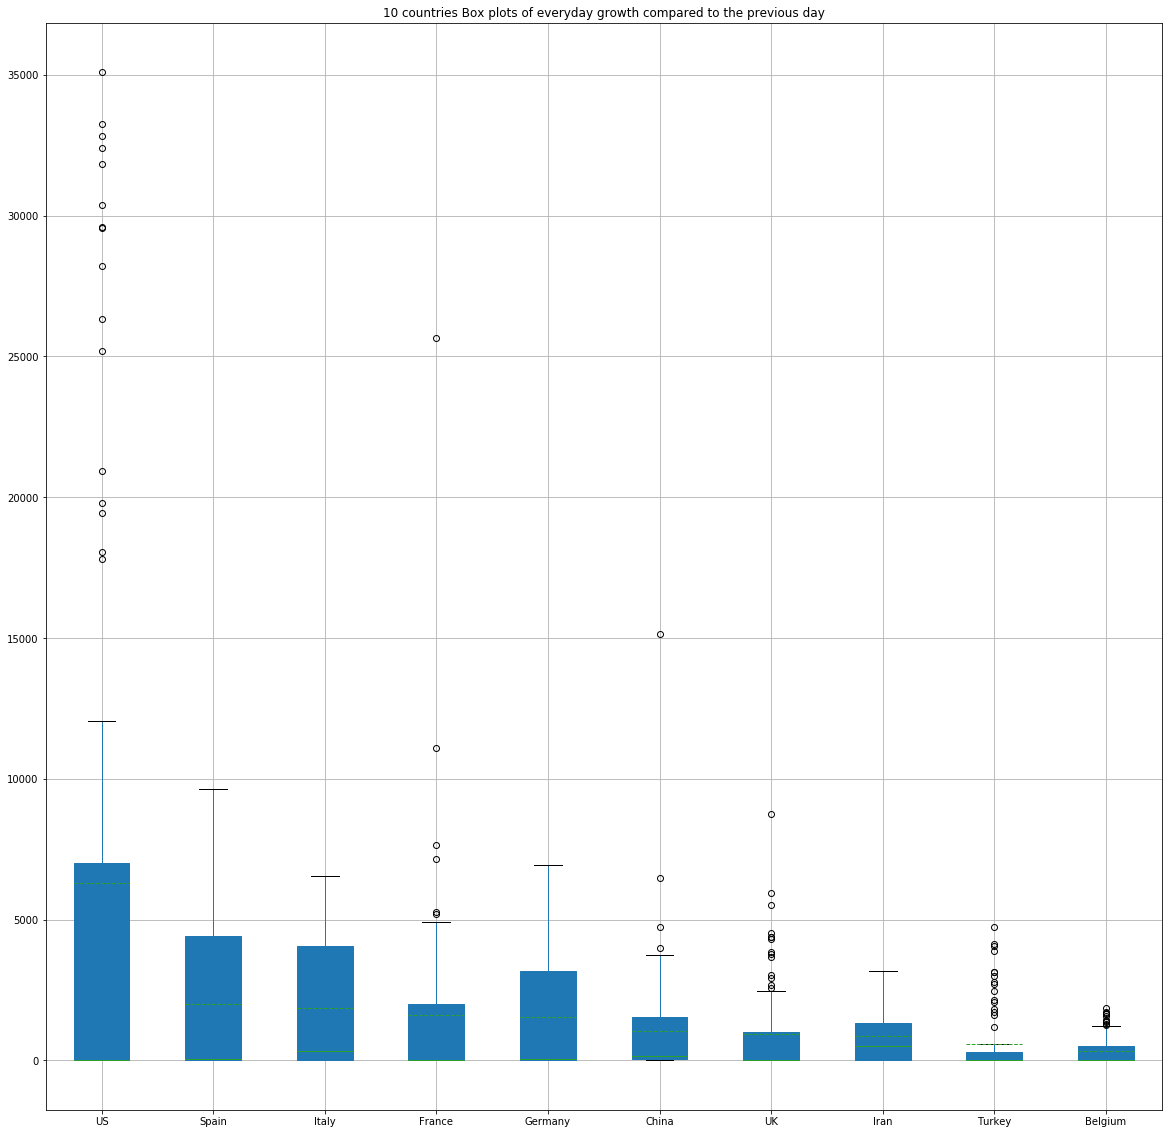

In [45]:
#Box plots of everyday growth compared to the previous day of ten countries
plt.figure(figsize=(20,20))
box = confirmed_increase.boxplot(sym='o', 
                   vert=True,  
                   whis=1.5,  
                   patch_artist=True,  
                   meanline=True, showmeans=True,  
                   showbox=True, 
                   showfliers=True,  
                   notch=False,  
                   return_type='dict')

plt.title('10 countries Box plots of everyday growth compared to the previous day')
plt.show()

In [46]:
git remote add origin https://github.com/ruiwen0923/COVID-19-Data-Analysis.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-46-bb7a27d1993b>, line 1)